In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 한글 폰트를 사용하기 위한 코드
import platform
if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif platform.system() == 'Linux':
    plt.rc('font', family='NanumGothic')

In [2]:
# data 가져오기
df = pd.read_csv('./t_data.csv')
# 결측값 확인
print(df.isnull().sum())
df

년도         0
날짜         0
승패         0
상대         0
AVG_K      0
OPS_K      0
LI_K       0
WPA_K      0
HR/AB_K    0
SO/AB_K    0
ERA_K      0
WHIP_K     0
LI_K.1     0
WPA_K.1    0
SO/IP_K    0
AVG_R      0
OPS_R      0
LI_R       0
WPA_R      0
HR/AB_R    0
SO/AB_R    0
ERA_R      0
WHIP_R     0
LI_R.1     0
WPA_R.1    0
SO/IP_R    0
dtype: int64


,년도,날짜,승패,상대,AVG_K,OPS_K,LI_K,WPA_K,HR/AB_K,SO/AB_K,...,OPS_R,LI_R,WPA_R,HR/AB_R,SO/AB_R,ERA_R,WHIP_R,LI_R.1,WPA_R.1,SO/IP_R
0,2018,3월 24일,0,kt,0.333,0.779,1.75,-0.225,0.000,0.222,...,0.883,1.01,0.275,0.081,0.243,4.00,1.56,1.7,0.225,0.889
1,2018,3월 25일,1,kt,0.410,1.224,0.24,0.395,0.103,0.205,...,0.545,0.23,-0.105,0.030,0.242,15.75,2.38,0.2,-0.395,1.000
2,2018,3월 27일,1,삼성,0.389,1.494,0.30,0.282,0.167,0.278,...,0.454,0.32,-0.218,0.000,0.156,19.13,2.88,0.3,-0.282,1.250
3,2018,3월 28일,0,삼성,0.156,0.479,0.89,-0.386,0.000,0.156,...,0.826,0.60,0.114,0.026,0.179,0.00,0.78,0.9,0.386,0.556
4,2018,3월 29일,1,삼성,0.394,1.080,0.61,0.147,0.061,0.212,...,0.372,0.84,-0.353,0.000,0.321,7.88,2.13,0.6,-0.147,0.875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,2021,10월 24일,0,NC,0.194,0.411,1.28,-0.361,0.000,0.333,...,0.698,1.20,0.139,0.032,0.323,1.00,0.89,1.3,0.361,1.333
550,2021,10월 27일,1,롯데,0.286,0.718,1.26,0.059,0.000,0.200,...,0.452,1.20,-0.441,0.032,0.161,3.00,1.56,1.3,-0.059,0.778
551,2021,10월 28일,1,롯데,0.188,0.559,0.96,0.222,0.031,0.219,...,0.754,1.38,-0.278,0.057,0.171,5.00,1.11,1.0,-0.222,0.778
552,2021,10월 29일,0,두산,0.286,0.833,0.81,-0.040,0.029,0.314,...,0.892,0.42,0.460,0.049,0.098,5.00,1.89,0.8,0.040,1.222


In [6]:
df.columns

Index(['년도', '날짜', '승패', '상대', 'AVG_K', 'OPS_K', 'LI_K', 'WPA_K', 'HR/AB_K',
       'SO/AB_K', 'ERA_K', 'WHIP_K', 'LI_K.1', 'WPA_K.1', 'SO/IP_K', 'AVG_R',
       'OPS_R', 'LI_R', 'WPA_R', 'HR/AB_R', 'SO/AB_R', 'ERA_R', 'WHIP_R',
       'LI_R.1', 'WPA_R.1', 'SO/IP_R'],
      dtype='object')

In [4]:
# 필요없는 특징 제거 (WPA, LI도 다 제외했음)
df_1 = df.drop(['년도', '날짜', '상대', 'WPA_K', 'WPA_K.1', 'LI_K', 'LI_K.1', 'LI_R', 'LI_R.1', 'WPA_R', 'WPA_R.1'], axis=1)
df_1

,승패,AVG_K,OPS_K,HR/AB_K,SO/AB_K,ERA_K,WHIP_K,SO/IP_K,AVG_R,OPS_R,HR/AB_R,SO/AB_R,ERA_R,WHIP_R,SO/IP_R
0,0,0.333,0.779,0.000,0.222,5.00,1.33,1.000,0.297,0.883,0.081,0.243,4.00,1.56,0.889
1,1,0.410,1.224,0.103,0.205,1.00,0.78,0.889,0.212,0.545,0.030,0.242,15.75,2.38,1.000
2,1,0.389,1.494,0.167,0.278,0.00,0.89,0.556,0.188,0.454,0.000,0.156,19.13,2.88,1.250
3,0,0.156,0.479,0.000,0.156,6.00,1.78,0.778,0.359,0.826,0.026,0.179,0.00,0.78,0.556
4,1,0.394,1.080,0.061,0.212,0.00,1.00,1.000,0.107,0.372,0.000,0.321,7.88,2.13,0.875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,0,0.194,0.411,0.000,0.333,3.38,1.38,1.250,0.258,0.698,0.032,0.323,1.00,0.89,1.333
550,1,0.286,0.718,0.000,0.200,2.00,0.56,0.556,0.161,0.452,0.032,0.161,3.00,1.56,0.778
551,1,0.188,0.559,0.031,0.219,3.00,1.33,0.667,0.257,0.754,0.057,0.171,5.00,1.11,0.778
552,0,0.286,0.833,0.029,0.314,8.00,2.11,0.444,0.317,0.892,0.049,0.098,5.00,1.89,1.222


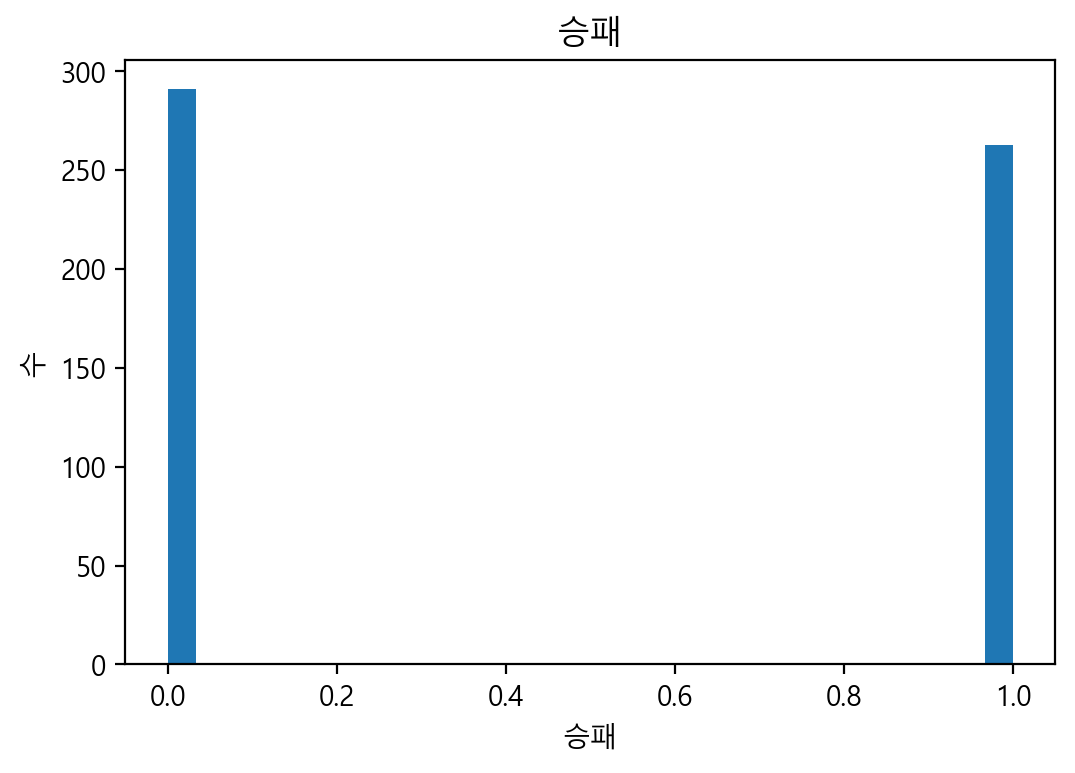

In [5]:
plt.figure(dpi=200)
plt.title("승패")
plt.xlabel('승패')
plt.ylabel('수')
plt.hist(df_1['승패'], bins=30)
plt.show()

In [6]:
# r- square
df_test = df_1.drop(['승패'], axis=1)
lm = sm.OLS(df_1['승패'], df_test)
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     승패   R-squared (uncentered):                   0.793
Model:                            OLS   Adj. R-squared (uncentered):              0.788
Method:                 Least Squares   F-statistic:                              147.8
Date:                Thu, 08 Dec 2022   Prob (F-statistic):                   2.90e-174
Time:                        16:22:12   Log-Likelihood:                         -143.41
No. Observations:                 554   AIC:                                      314.8
Df Residuals:                     540   BIC:                                      375.3
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AVG_K         -0.7454      0.620     -1.203      0.229      -1.962       0.472
OPS_K          0.7599      0.323      2.350      0.019       0.125       1.395
HR/AB_K       -1.8006      1.029     -1.750      0.081      -3.822       0.221
SO/AB_K        0.1847      1.045      0.177      0.860      -1.867       2.237
ERA_K         -0.0543      0.007     -7.697      0.000      -0.068      -0.040
WHIP_K        -0.0089      0.060     -0.149      0.882      -0.126       0.108
SO/IP_K       -0.7308      0.220     -3.315      0.001      -1.164      -0.298
AVG_R          0.7335      0.469      1.564      0.118      -0.188       1.655
OPS_R         -0.1748      0.199     -0.877      0.381      -0.566       0.217
HR/AB_R       -0.3014      0.465     -0.649      0.517      -1.214       0.611
SO/AB_R        3.4517      0.834      4.137      0.000       1.813       5.091
ERA_R          0.0457      0.008      5.944      0.000       0.031       0.061
WHIP_R         0.0313      0.073      0.429      0.668      -0.112       0.175
SO/IP_R       -0.0435      0.276     -0.158      0.875      -0.586       0.499
==============================================================================
Omnibus:                       23.236   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               10.379
Skew:                           0.035   Prob(JB):                      0.00557
Kurtosis:                       2.333   Cond. No.                         780.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
#data, label 나누기
df_train = df_1.drop(['승패'], axis = 1) 
df_label = df_1.loc[:, ['승패']]

In [8]:
# 잘 나눠졌는지 확인
df_train

,AVG_K,OPS_K,HR/AB_K,SO/AB_K,ERA_K,WHIP_K,SO/IP_K,AVG_R,OPS_R,HR/AB_R,SO/AB_R,ERA_R,WHIP_R,SO/IP_R
0,0.333,0.779,0.000,0.222,5.00,1.33,1.000,0.297,0.883,0.081,0.243,4.00,1.56,0.889
1,0.410,1.224,0.103,0.205,1.00,0.78,0.889,0.212,0.545,0.030,0.242,15.75,2.38,1.000
2,0.389,1.494,0.167,0.278,0.00,0.89,0.556,0.188,0.454,0.000,0.156,19.13,2.88,1.250
3,0.156,0.479,0.000,0.156,6.00,1.78,0.778,0.359,0.826,0.026,0.179,0.00,0.78,0.556
4,0.394,1.080,0.061,0.212,0.00,1.00,1.000,0.107,0.372,0.000,0.321,7.88,2.13,0.875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,0.194,0.411,0.000,0.333,3.38,1.38,1.250,0.258,0.698,0.032,0.323,1.00,0.89,1.333
550,0.286,0.718,0.000,0.200,2.00,0.56,0.556,0.161,0.452,0.032,0.161,3.00,1.56,0.778
551,0.188,0.559,0.031,0.219,3.00,1.33,0.667,0.257,0.754,0.057,0.171,5.00,1.11,0.778
552,0.286,0.833,0.029,0.314,8.00,2.11,0.444,0.317,0.892,0.049,0.098,5.00,1.89,1.222


In [9]:
df_label

,승패
0,0
1,1
2,1
3,0
4,1
...,...
549,0
550,1
551,1
552,0


In [10]:
# dataFrame -> numpy
df_res = df_train.values
df_label = df_label.values

In [11]:
print(df_res.shape)
print(df_label.shape)

(554, 14)
(554, 1)


In [12]:
# train, test data 분리 (8 : 2)
x_train, x_test, y_train, y_test = train_test_split(df_res, df_label, test_size=0.2, shuffle=False)

In [13]:
# 잘 분리됐는지 확인
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(443, 14)
(111, 14)
(443, 1)
(111, 1)


In [14]:
x_train

array([[ 0.333,  0.779,  0.   , ...,  4.   ,  1.56 ,  0.889],
       [ 0.41 ,  1.224,  0.103, ..., 15.75 ,  2.38 ,  1.   ],
       [ 0.389,  1.494,  0.167, ..., 19.13 ,  2.88 ,  1.25 ],
       ...,
       [ 0.39 ,  0.898,  0.   , ..., 11.   ,  2.22 ,  0.889],
       [ 0.194,  0.532,  0.   , ...,  2.7  ,  1.3  ,  0.6  ],
       [ 0.133,  0.508,  0.   , ...,  2.   ,  1.44 ,  0.667]])

In [15]:
y_train

array([[0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
    

In [43]:
from sklearn import ensemble
from sklearn.model_selection import GridSearchCV

# 랜덤포레스트 회귀분석

#params = {
#   'max_features':[0.6, 0.8, 1, 1.2],
#    'max_depth':[3,4,5,6,7,8,9, 10]
#} 

rf = ensemble.RandomForestRegressor(n_estimators=100)

#grid_cv = GridSearchCV(rf, params, cv=5, n_jobs=-1, verbose=1)
#grid_cv.fit(x_train, y_train)

In [44]:
print('최적 하이퍼 파라미터 : \n', grid_cv.best_params_)

최적 하이퍼 파라미터 : 
 {'max_depth': 6, 'max_features': 0.8}


In [45]:
rf.fit(x_train, y_train)

C:\Miniconda\envs\chonnam\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor()

In [46]:
from sklearn.metrics import accuracy_score

pred = rf.predict(x_test)
rmse = np.sqrt(mean_squared_error(pred, y_test))

In [47]:
pred_test = np.round(pred, 0).flatten()
pred_test

acc2 = accuracy_score(y_test, pred_test)
print("정확도 : {0:.4f}".format(acc2 * 100))

정확도 : 96.3964


In [48]:
rmse

0.18869633357939503

In [49]:
pred

array([0.94, 0.01, 0.86, 0.89, 0.  , 0.67, 0.66, 0.87, 1.  , 0.01, 0.03,
       0.  , 0.96, 0.06, 0.06, 0.  , 0.99, 1.  , 0.02, 0.  , 0.  , 0.02,
       0.12, 0.  , 1.  , 0.  , 0.53, 0.99, 0.67, 0.08, 0.14, 0.  , 0.7 ,
       0.61, 0.  , 0.  , 0.  , 0.92, 0.06, 0.77, 0.  , 0.04, 0.  , 0.  ,
       0.  , 0.01, 0.7 , 0.  , 0.  , 0.  , 0.06, 0.08, 1.  , 1.  , 0.98,
       0.99, 1.  , 0.93, 0.42, 0.99, 0.01, 0.86, 0.86, 0.  , 0.  , 0.92,
       0.03, 0.01, 0.89, 0.03, 0.  , 0.02, 0.  , 0.11, 1.  , 0.01, 0.21,
       0.98, 0.99, 0.  , 1.  , 0.09, 0.  , 1.  , 0.45, 0.07, 1.  , 1.  ,
       0.19, 0.41, 1.  , 0.99, 0.02, 0.72, 0.  , 1.  , 0.44, 0.33, 0.02,
       1.  , 0.89, 1.  , 0.63, 0.  , 1.  , 1.  , 0.06, 0.93, 0.92, 0.  ,
       0.06])

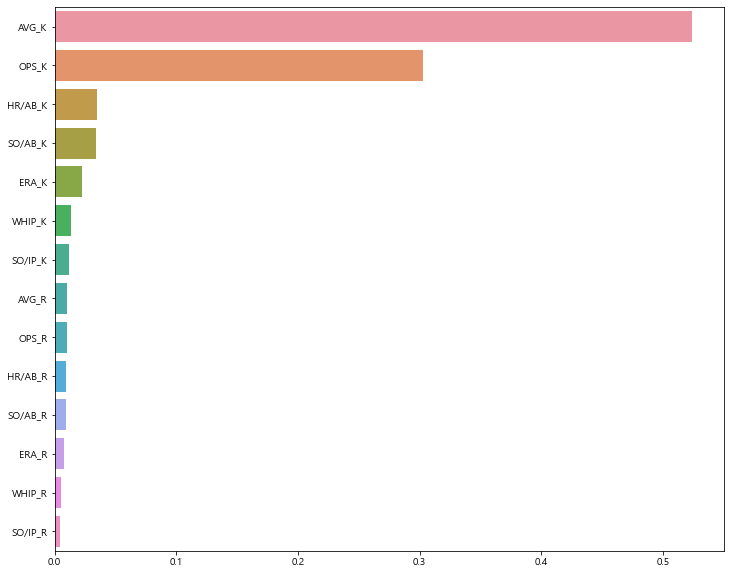

In [50]:
%matplotlib inline

feature_importances = rf.feature_importances_

ft_importances = pd.Series(feature_importances, index = df_train.columns)
ft_importances = ft_importances.sort_values(ascending=False)

plt.figure(figsize=(12,10))
sns.barplot(x=ft_importances, y= df_train.columns)
plt.show()

In [51]:
# 2022년 data 가져오기
df_t = pd.read_csv('./test_data.csv')
# 결측값 확인
print(df_t.isnull().sum())
df_t

이닝            0
AVG_K         0
OPS_K         0
HR / AB_K     0
SO / AB_K     0
ERA_K         0
WHIP_K        0
SO(상)/IP_K    0
AVG_R         0
OPS_R         0
HR / AB_R     0
SO / AB_R     0
ERA_R         0
WHIP_R        0
SO(상)/IP_R    0
승패            0
dtype: int64


,이닝,AVG_K,OPS_K,HR / AB_K,SO / AB_K,ERA_K,WHIP_K,SO(상)/IP_K,AVG_R,OPS_R,HR / AB_R,SO / AB_R,ERA_R,WHIP_R,SO(상)/IP_R,승패
0,1회,0.000000,0.250000,0.000000,0.333333,0.000000,1.000000,0.000,0.000000,0.333333,0.000000,0.000000,0.000000,1.000,1.000000,1
1,2회,0.142857,0.476190,0.000000,0.142857,0.000000,1.500000,0.000,0.333333,0.761905,0.000000,0.000000,4.500000,1.500,0.500000,1
2,3회,0.100000,0.350000,0.000000,0.100000,0.000000,1.333333,0.000,0.222222,0.585859,0.000000,0.000000,4.500000,1.000,0.333333,1
3,4회,0.294118,0.839009,0.058824,0.117647,0.000000,1.000000,0.500,0.166667,0.452381,0.000000,0.166667,11.250000,1.750,0.500000,1
4,5회,0.300000,0.841304,0.050000,0.100000,3.600000,1.600000,0.400,0.235294,0.675070,0.000000,0.117647,9.000000,1.800,0.400000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,4회,0.411765,1.032680,0.058824,0.176471,11.250000,3.250000,1.000,0.428571,1.281905,0.047619,0.190476,4.500000,2.000,0.750000,0
60,5회,0.350000,0.880952,0.050000,0.250000,10.800000,3.000000,1.000,0.400000,1.180000,0.040000,0.200000,3.600000,1.600,1.000000,0
61,6회,0.384615,1.082418,0.076923,0.192308,9.000000,2.666667,1.000,0.357143,1.077731,0.035714,0.214286,7.500000,2.000,0.833333,0
62,7회,0.387097,1.037146,0.064516,0.193548,7.714286,2.285714,1.000,0.322581,0.980820,0.032258,0.225806,6.428571,2.000,0.857143,0


In [52]:
# 필요없는 특징 제거 (WPA, LI도 다 제외했음)
df_t1 = df_t.drop(['이닝'], axis=1)
df_t1

,AVG_K,OPS_K,HR / AB_K,SO / AB_K,ERA_K,WHIP_K,SO(상)/IP_K,AVG_R,OPS_R,HR / AB_R,SO / AB_R,ERA_R,WHIP_R,SO(상)/IP_R,승패
0,0.000000,0.250000,0.000000,0.333333,0.000000,1.000000,0.000,0.000000,0.333333,0.000000,0.000000,0.000000,1.000,1.000000,1
1,0.142857,0.476190,0.000000,0.142857,0.000000,1.500000,0.000,0.333333,0.761905,0.000000,0.000000,4.500000,1.500,0.500000,1
2,0.100000,0.350000,0.000000,0.100000,0.000000,1.333333,0.000,0.222222,0.585859,0.000000,0.000000,4.500000,1.000,0.333333,1
3,0.294118,0.839009,0.058824,0.117647,0.000000,1.000000,0.500,0.166667,0.452381,0.000000,0.166667,11.250000,1.750,0.500000,1
4,0.300000,0.841304,0.050000,0.100000,3.600000,1.600000,0.400,0.235294,0.675070,0.000000,0.117647,9.000000,1.800,0.400000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,0.411765,1.032680,0.058824,0.176471,11.250000,3.250000,1.000,0.428571,1.281905,0.047619,0.190476,4.500000,2.000,0.750000,0
60,0.350000,0.880952,0.050000,0.250000,10.800000,3.000000,1.000,0.400000,1.180000,0.040000,0.200000,3.600000,1.600,1.000000,0
61,0.384615,1.082418,0.076923,0.192308,9.000000,2.666667,1.000,0.357143,1.077731,0.035714,0.214286,7.500000,2.000,0.833333,0
62,0.387097,1.037146,0.064516,0.193548,7.714286,2.285714,1.000,0.322581,0.980820,0.032258,0.225806,6.428571,2.000,0.857143,0


In [53]:
df_train_test = df_t1.drop(['승패'], axis = 1) 
df_label_test = df_t1.loc[:, ['승패']]

In [54]:
df_train_test

,AVG_K,OPS_K,HR / AB_K,SO / AB_K,ERA_K,WHIP_K,SO(상)/IP_K,AVG_R,OPS_R,HR / AB_R,SO / AB_R,ERA_R,WHIP_R,SO(상)/IP_R
0,0.000000,0.250000,0.000000,0.333333,0.000000,1.000000,0.000,0.000000,0.333333,0.000000,0.000000,0.000000,1.000,1.000000
1,0.142857,0.476190,0.000000,0.142857,0.000000,1.500000,0.000,0.333333,0.761905,0.000000,0.000000,4.500000,1.500,0.500000
2,0.100000,0.350000,0.000000,0.100000,0.000000,1.333333,0.000,0.222222,0.585859,0.000000,0.000000,4.500000,1.000,0.333333
3,0.294118,0.839009,0.058824,0.117647,0.000000,1.000000,0.500,0.166667,0.452381,0.000000,0.166667,11.250000,1.750,0.500000
4,0.300000,0.841304,0.050000,0.100000,3.600000,1.600000,0.400,0.235294,0.675070,0.000000,0.117647,9.000000,1.800,0.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,0.411765,1.032680,0.058824,0.176471,11.250000,3.250000,1.000,0.428571,1.281905,0.047619,0.190476,4.500000,2.000,0.750000
60,0.350000,0.880952,0.050000,0.250000,10.800000,3.000000,1.000,0.400000,1.180000,0.040000,0.200000,3.600000,1.600,1.000000
61,0.384615,1.082418,0.076923,0.192308,9.000000,2.666667,1.000,0.357143,1.077731,0.035714,0.214286,7.500000,2.000,0.833333
62,0.387097,1.037146,0.064516,0.193548,7.714286,2.285714,1.000,0.322581,0.980820,0.032258,0.225806,6.428571,2.000,0.857143


In [55]:
df_label_test

,승패
0,1
1,1
2,1
3,1
4,1
...,...
59,0
60,0
61,0
62,0


In [56]:
pred = rf.predict(df_train_test)
pred

C:\Miniconda\envs\chonnam\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([0.48, 0.88, 0.88, 1.  , 0.98, 0.99, 1.  , 1.  , 0.79, 0.01, 0.11,
       0.  , 0.  , 0.03, 0.03, 0.13, 0.45, 0.48, 0.77, 0.78, 0.78, 1.  ,
       0.99, 0.99, 0.59, 0.04, 0.01, 0.03, 0.05, 0.01, 0.01, 0.01, 0.86,
       0.59, 1.  , 0.99, 0.99, 0.96, 0.91, 0.92, 0.55, 0.21, 0.61, 0.01,
       0.  , 0.  , 0.  , 0.  , 0.27, 0.95, 0.95, 0.92, 0.97, 1.  , 0.98,
       1.  , 0.08, 0.02, 0.06, 0.06, 0.02, 0.1 , 0.18, 0.29])

In [57]:
a = 1
b = 1
for i in range(len(pred)):
    print("%d ~ %d 이닝에서 기아가 이길 확률은 %.1f 입니다." %(a, b, pred[i] * 100))
    b += 1
    if(b == 9):
        b = 1

1 ~ 1 이닝에서 기아가 이길 확률은 48.0 입니다.
1 ~ 2 이닝에서 기아가 이길 확률은 88.0 입니다.
1 ~ 3 이닝에서 기아가 이길 확률은 88.0 입니다.
1 ~ 4 이닝에서 기아가 이길 확률은 100.0 입니다.
1 ~ 5 이닝에서 기아가 이길 확률은 98.0 입니다.
1 ~ 6 이닝에서 기아가 이길 확률은 99.0 입니다.
1 ~ 7 이닝에서 기아가 이길 확률은 100.0 입니다.
1 ~ 8 이닝에서 기아가 이길 확률은 100.0 입니다.
1 ~ 1 이닝에서 기아가 이길 확률은 79.0 입니다.
1 ~ 2 이닝에서 기아가 이길 확률은 1.0 입니다.
1 ~ 3 이닝에서 기아가 이길 확률은 11.0 입니다.
1 ~ 4 이닝에서 기아가 이길 확률은 0.0 입니다.
1 ~ 5 이닝에서 기아가 이길 확률은 0.0 입니다.
1 ~ 6 이닝에서 기아가 이길 확률은 3.0 입니다.
1 ~ 7 이닝에서 기아가 이길 확률은 3.0 입니다.
1 ~ 8 이닝에서 기아가 이길 확률은 13.0 입니다.
1 ~ 1 이닝에서 기아가 이길 확률은 45.0 입니다.
1 ~ 2 이닝에서 기아가 이길 확률은 48.0 입니다.
1 ~ 3 이닝에서 기아가 이길 확률은 77.0 입니다.
1 ~ 4 이닝에서 기아가 이길 확률은 78.0 입니다.
1 ~ 5 이닝에서 기아가 이길 확률은 78.0 입니다.
1 ~ 6 이닝에서 기아가 이길 확률은 100.0 입니다.
1 ~ 7 이닝에서 기아가 이길 확률은 99.0 입니다.
1 ~ 8 이닝에서 기아가 이길 확률은 99.0 입니다.
1 ~ 1 이닝에서 기아가 이길 확률은 59.0 입니다.
1 ~ 2 이닝에서 기아가 이길 확률은 4.0 입니다.
1 ~ 3 이닝에서 기아가 이길 확률은 1.0 입니다.
1 ~ 4 이닝에서 기아가 이길 확률은 3.0 입니다.
1 ~ 5 이닝에서 기아가 이길 확률은 5.0 입니다.
1 ~ 6 이닝에서 기아가 이길 확률은 1.0 입니다.
1 ~ 7 이닝에서 기아가 이길 확률은 1.0 입니다.
1 ~ 8 이닝에서 기아가 